## QUESTION 1: Factors that impact salary
To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:

-NLP

-Unsupervised learning and dimensionality reduction techniques (PCA, clustering)

-Ensemble methods and decision tree models

-SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key. Note that most listings DO NOT come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

In [41]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [42]:
df = pd.read_csv('./salary_df_car_fut.csv')

In [43]:
df.head()

,Unnamed: 0,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,0,SKILLSFUTURE SINGAPORE AGENCY,"Executive, (Quality Management Division) (6-mo...","ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",Contract,NONE,Public / Civil Service,NONE,Roles & ResponsibilitiesResponsibilities\r\n\r...,NONE
1,1,HP PPS ASIA PACIFIC PTE. LTD.,Business Analyst,1 DEPOT CLOSE 109841,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...
2,2,SHOPEE SINGAPORE PRIVATE LIMITED,Software Engineer,"GALAXIS, 1 FUSIONOPOLIS PLACE 138522","Permanent, Full Time",Executive,Information Technology,"$4,400to$8,000",Roles & ResponsibilitiesResponsibilities: De...,RequirementsRequirements: Minimum B.S. degre...
3,3,PRICEWATERHOUSECOOPERS CONSULTING (SINGAPORE) ...,Data Analytics –Manager,"MARINA ONE EAST TOWER, 7 STRAITS VIEW 018936","Permanent, Contract, Full Time",Manager,Consulting,"$6,200to$9,500",Roles & Responsibilities Advisory - Consulting...,Requirements A good Degree in a quantitative ...
4,4,Company Undisclosed,Research Fellow,NONE,"Contract, Full Time","Professional, Executive",Others,"$4,000to$5,000",Roles & ResponsibilitiesData Scientist / Progr...,Requirements Doctorate degree in a relevant fi...


In [44]:
df.shape

(1627, 10)

In [45]:
df.columns

Index([u'Unnamed: 0', u'Company', u'Title', u'Address', u'Emp_type',
       u'Seniority', u'Industry', u'Salary', u'Responsibility',
       u'Requirements'],
      dtype='object')

In [46]:
df = df.replace('NONE',np.nan)
df = df.drop(['Unnamed: 0'], axis=1 )
df.head()

,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,SKILLSFUTURE SINGAPORE AGENCY,"Executive, (Quality Management Division) (6-mo...","ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",Contract,NaN,Public / Civil Service,NaN,Roles & ResponsibilitiesResponsibilities\r\n\r...,NaN
1,HP PPS ASIA PACIFIC PTE. LTD.,Business Analyst,1 DEPOT CLOSE 109841,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...
2,SHOPEE SINGAPORE PRIVATE LIMITED,Software Engineer,"GALAXIS, 1 FUSIONOPOLIS PLACE 138522","Permanent, Full Time",Executive,Information Technology,"$4,400to$8,000",Roles & ResponsibilitiesResponsibilities: De...,RequirementsRequirements: Minimum B.S. degre...
3,PRICEWATERHOUSECOOPERS CONSULTING (SINGAPORE) ...,Data Analytics –Manager,"MARINA ONE EAST TOWER, 7 STRAITS VIEW 018936","Permanent, Contract, Full Time",Manager,Consulting,"$6,200to$9,500",Roles & Responsibilities Advisory - Consulting...,Requirements A good Degree in a quantitative ...
4,Company Undisclosed,Research Fellow,NaN,"Contract, Full Time","Professional, Executive",Others,"$4,000to$5,000",Roles & ResponsibilitiesData Scientist / Progr...,Requirements Doctorate degree in a relevant fi...


## Cleaning and Splitting salary to lower,upper and average


In [47]:

df = df[~df['Salary'].isnull()]
df = df.drop_duplicates()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 1 to 1625
Data columns (total 9 columns):
Company           1246 non-null object
Title             1246 non-null object
Address           935 non-null object
Emp_type          1246 non-null object
Seniority         1236 non-null object
Industry          1246 non-null object
Salary            1246 non-null object
Responsibility    1246 non-null object
Requirements      1227 non-null object
dtypes: object(9)
memory usage: 97.3+ KB


In [49]:
df['Salary_lower'] = df['Salary'].map(lambda x: x.replace('$','').replace(',','').split('to')[0]).astype('float')
df['Salary_upper'] = df['Salary'].map(lambda x: x.replace('$','').replace(',','').split('to')[1]).astype('float')
df['Salary_avg'] = (df['Salary_lower']+df['Salary_upper'])/2

count      1246.000000
mean       9315.684992
std       17810.283889
min           1.000000
25%        5000.000000
50%        6500.000000
75%        9000.000000
max      300000.000000
Name: Salary_avg, dtype: float64


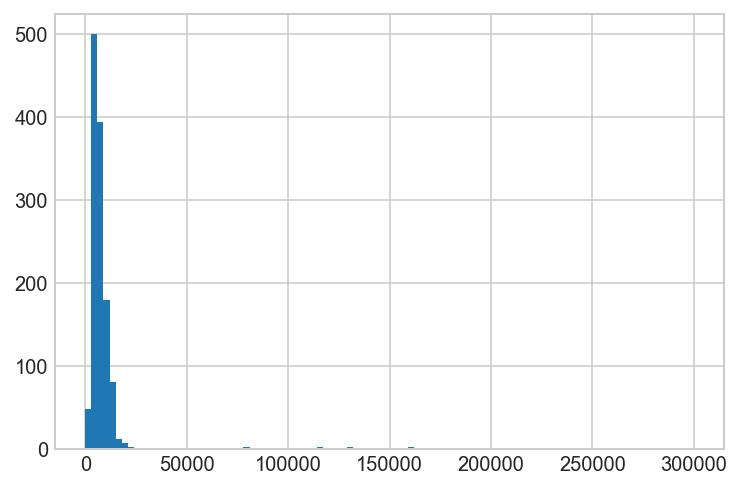

In [50]:
print(df['Salary_avg'].describe())
df['Salary_avg'].hist(bins=100)

In [51]:
df.head()

,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements,Salary_lower,Salary_upper,Salary_avg
1,HP PPS ASIA PACIFIC PTE. LTD.,Business Analyst,1 DEPOT CLOSE 109841,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...,8400.0,12900.0,10650.0
2,SHOPEE SINGAPORE PRIVATE LIMITED,Software Engineer,"GALAXIS, 1 FUSIONOPOLIS PLACE 138522","Permanent, Full Time",Executive,Information Technology,"$4,400to$8,000",Roles & ResponsibilitiesResponsibilities: De...,RequirementsRequirements: Minimum B.S. degre...,4400.0,8000.0,6200.0
3,PRICEWATERHOUSECOOPERS CONSULTING (SINGAPORE) ...,Data Analytics –Manager,"MARINA ONE EAST TOWER, 7 STRAITS VIEW 018936","Permanent, Contract, Full Time",Manager,Consulting,"$6,200to$9,500",Roles & Responsibilities Advisory - Consulting...,Requirements A good Degree in a quantitative ...,6200.0,9500.0,7850.0
4,Company Undisclosed,Research Fellow,NaN,"Contract, Full Time","Professional, Executive",Others,"$4,000to$5,000",Roles & ResponsibilitiesData Scientist / Progr...,Requirements Doctorate degree in a relevant fi...,4000.0,5000.0,4500.0
6,"JPMORGAN CHASE BANK, N.A.","Application Support Analyst, Reference Data Team",NaN,Full Time,Executive,Information Technology,"$6,000to$12,000",Roles & ResponsibilitiesWe are seeking an Appl...,RequirementsQualifications 7-10 years Product...,6000.0,12000.0,9000.0


## Putting all the text together

In [52]:
df["text"] =  df["Company"] + df["Title"] + df["Emp_type"] + df["Seniority"] + df["Industry"] + df["Salary"] + df["Responsibility"] + df["Requirements"] 

In [53]:
df["text"].isnull().sum()
df_clean = df[~(df["text"].isnull())][['text','Salary_avg']]

df_clean.isnull().sum()

text          0
Salary_avg    0
dtype: int64

In [54]:
# removing puncuations and lower text
import string 
import re
df_clean["text"] = df_clean["text"].map(lambda x: re.sub('[^ a-zA-Z0-9]', '', x).lower())
df_clean["text"].values

array(['hp pps asia pacific pte ltdbusiness analystpermanent full timeprofessionalothers8400to12900roles  responsibilitieshp is the worlds leading personal systems and printing company we create technology that makes life better for everyone everywhere our innovation springs from a team of individuals each collaborating and contributing their own perspectives knowledge and experience to advance the way the world works and lives we are looking for visionaries like you who are ready to make a purposeful impact on the way the world works  at hp the future is yours to create if you are our business analyst in singapore you will have a chance to   provide analysis to support businessteams needs by ensuring data integrity  accuracy be the interface to sales operations be the interface to external analyst canalys  idc establish  enable quarterly published reports drive regular  scheduled review of analysis with team  cross team members update market share quarterly  provide insights small and

In [55]:
df_clean.head()

,text,Salary_avg
1,hp pps asia pacific pte ltdbusiness analystper...,10650.0
2,shopee singapore private limitedsoftware engin...,6200.0
3,pricewaterhousecoopers consulting singapore pt...,7850.0
4,company undisclosedresearch fellowcontract ful...,4500.0
6,jpmorgan chase bank naapplication support anal...,9000.0


## Starting the NLP portion

In [56]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

%matplotlib inline

sns.set_style("darkgrid")

In [57]:
cvt      =  CountVectorizer(strip_accents='unicode', stop_words="english", min_df=51)
X_all    =  cvt.fit_transform(df_clean['text'])
columns  =  np.array(cvt.get_feature_names()) 

X_all


<1227x886 sparse matrix of type '<type 'numpy.int64'>'
	with 131032 stored elements in Compressed Sparse Row format>

In [58]:
def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]

    # pretty-print the results! Remember to always ask whether they make sense ...
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words


freq_words = get_freq_words(X_all, columns)
freq_words[:20]

data            4871
experience      4237
business        4126
management      2407
team            2366
skills          2117
work            2110
analytics       1718
requirements    1639
development     1575
strong          1479
support         1437
knowledge       1428
working         1331
project         1285
solutions       1221
ability         1215
analysis        1157
design          1153
years           1099
dtype: int64

In [61]:
cvt = CountVectorizer(stop_words="english", ngram_range=(1,3))
X_all = cvt.fit_transform(df_clean['text'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head()


(370474L,)


data          4871
experience    4237
business      4126
management    2407
team          2366
dtype: int64

In [29]:
df_clean['Salary_avg'].describe()

count     1226.000000
mean      7251.650897
std       3275.752636
min        400.000000
25%       5000.000000
50%       6500.000000
75%       9000.000000
max      25000.000000
Name: Salary_avg, dtype: float64

In [21]:
# at max 300000 was a really odd number on further exploration realized that this was an annual income therefore
# it is not an actual representation of the "true" max so to speak 
print np.median(df_clean['Salary_avg'])+np.std(df_clean['Salary_avg'])
len(df_clean[df_clean['Salary_avg']>np.median(df_clean['Salary_avg'])+np.std(df_clean['Salary_avg'])])

24431.57695698307


25

In [22]:
df_clean = df_clean[df_clean['Salary_avg']>1] #remove outlier 1
df_clean['Salary_avg'] = df_clean['Salary_avg'].map(lambda x: x/12 if x>np.median(df_clean['Salary_avg'])+np.std(df_clean['Salary_avg']) else x) #normalise to monthly

In [23]:
df_clean['Salary_avg'].describe()

count     1226.000000
mean      7251.650897
std       3275.752636
min        400.000000
25%       5000.000000
50%       6500.000000
75%       9000.000000
max      25000.000000
Name: Salary_avg, dtype: float64

In [24]:
df_clean['Salary_avg_cat'] = df_clean['Salary_avg'].apply(lambda x: 0 if x < 5000 else 2 if x > 9000 else 1)
df_clean[['Salary_avg','Salary_avg_cat']]

,Salary_avg,Salary_avg_cat
1,10650.000000,2
2,6200.000000,1
3,7850.000000,1
4,4500.000000,0
6,9000.000000,1
7,11250.000000,2
8,3750.000000,0
9,5500.000000,1
11,9166.666667,2
12,4250.000000,0


In [25]:
df_clean.head()

,text,Salary_avg,Salary_avg_cat
1,hp pps asia pacific pte ltdbusiness analystper...,10650.0,2
2,shopee singapore private limitedsoftware engin...,6200.0,1
3,pricewaterhousecoopers consulting singapore pt...,7850.0,1
4,company undisclosedresearch fellowcontract ful...,4500.0,0
6,jpmorgan chase bank naapplication support anal...,9000.0,1


## Using Logistic Regression

In [30]:
X = X_all
y = df_clean['Salary_avg_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [32]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.632


In [33]:
y_train.value_counts()/len(y_train)*100

1    51.631702
2    24.592075
0    23.776224
Name: Salary_avg_cat, dtype: float64

In [34]:
y_pred, y_test

(array([2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
        1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2,
        1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
        1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1,
        1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 

## Confusion Matrix and Score

In [35]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1,2]))

confusion = pd.DataFrame(conmat, index=[0,1,2],
                         columns=['predicted_0','predicted_1','predicted_2'])
print confusion
#precision, recall and f1
from sklearn.metrics import classification_report
print classification_report(y_test, y_pred)


   predicted_0  predicted_1  predicted_2
0           46           46            6
1           15          150           22
2            3           44           36
             precision    recall  f1-score   support

          0       0.72      0.47      0.57        98
          1       0.62      0.80      0.70       187
          2       0.56      0.43      0.49        83

avg / total       0.64      0.63      0.62       368

